### Import all libraries

In [249]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

### Load The Dataset

In [250]:
data = pd.read_csv('healthcare_dataset.csv')

In [251]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### Checking Missing Value

In [252]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

### Summary of Dataframe

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

### Generates descriptive statistics 

In [254]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


### Checking shape of dataset

In [255]:
data.shape

(55500, 15)

### Name of all columns

In [256]:
data.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

### Loop for identify all unique values

In [257]:
for i in data.columns:
    if i in ['Name', 'Age', 'Doctor','Billing Amount','Room Number','Date of Admission','Discharge Date']:
        continue
    unique_values = data[i].unique()
    print(f"Unique values in column '{i}': {unique_values}")

Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'Blood Type': ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Unique values in column 'Medical Condition': ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Unique values in column 'Hospital': ['Sons and Miller' 'Kim Inc' 'Cook PLC' ... 'Guzman Jones and Graves,'
 'and Williams, Brown Mckenzie' 'Moreno Murphy, Griffith and']
Unique values in column 'Insurance Provider': ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Unique values in column 'Admission Type': ['Urgent' 'Emergency' 'Elective']
Unique values in column 'Medication': ['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']
Unique values in column 'Test Results': ['Normal' 'Inconclusive' 'Abnormal']


### Drop columns from the DataFrame 

In [258]:
data = data.drop(columns = ['Name', 'Room Number'], axis=1)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Date of Admission   55500 non-null  object 
 5   Doctor              55500 non-null  object 
 6   Hospital            55500 non-null  object 
 7   Insurance Provider  55500 non-null  object 
 8   Billing Amount      55500 non-null  float64
 9   Admission Type      55500 non-null  object 
 10  Discharge Date      55500 non-null  object 
 11  Medication          55500 non-null  object 
 12  Test Results        55500 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.5+ MB


### Top five row of Dataset

In [259]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal


### Convert date columns to datetime

In [260]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

### Create new features Admit_Duration

In [261]:
data['Admit_Duration'] = (data['Discharge Date'] - data['Date of Admission']).dt.days

### Drop Date Column

In [262]:
data = data.drop(columns = ['Date of Admission','Discharge Date'], axis=1)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 55500 non-null  int64  
 1   Gender              55500 non-null  object 
 2   Blood Type          55500 non-null  object 
 3   Medical Condition   55500 non-null  object 
 4   Doctor              55500 non-null  object 
 5   Hospital            55500 non-null  object 
 6   Insurance Provider  55500 non-null  object 
 7   Billing Amount      55500 non-null  float64
 8   Admission Type      55500 non-null  object 
 9   Medication          55500 non-null  object 
 10  Test Results        55500 non-null  object 
 11  Admit_Duration      55500 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 5.1+ MB


## Exploratory Data Analysis

### Filter numeric columns

In [263]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

### Plotting boxplots for each numerical feature to identify outliers

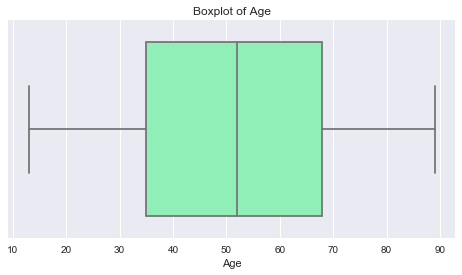

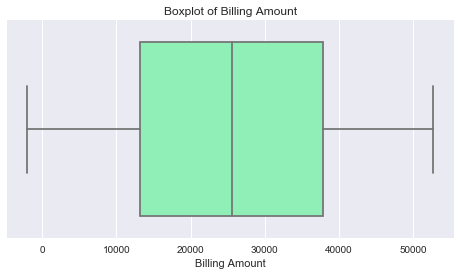

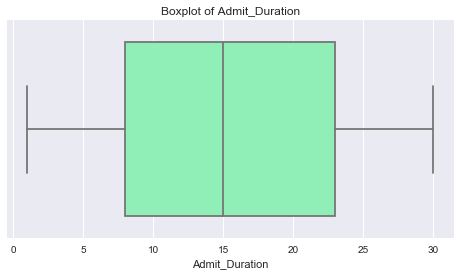

In [264]:
for column in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

* from the above boxplot, we can see that, there is no outlier in numerical column

### Calculate the correlation matrix

In [265]:
numeric_columns = data.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

### Create a heatmap to visualize the correlations

Text(0.5, 1, 'Correlation Matrix')

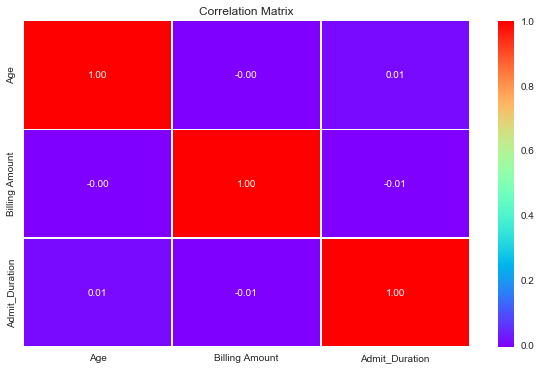

In [266]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

### Plotting countplots and piechart for categorical columns

<Figure size 1440x720 with 0 Axes>

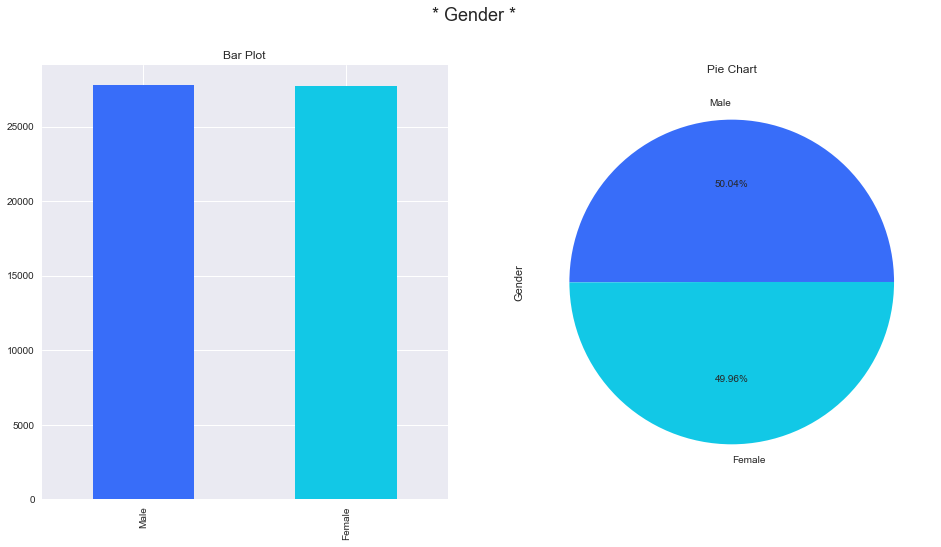

<Figure size 1440x720 with 0 Axes>

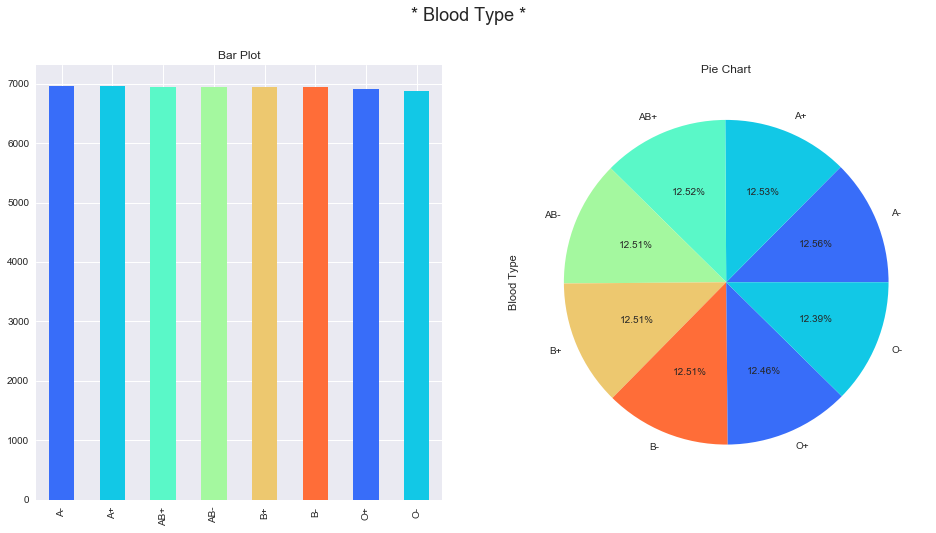

<Figure size 1440x720 with 0 Axes>

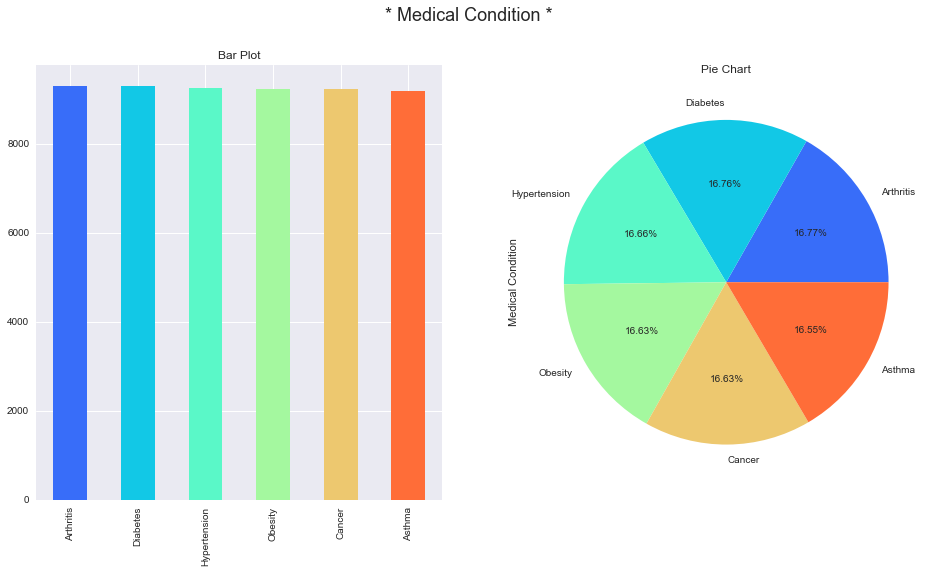

<Figure size 1440x720 with 0 Axes>

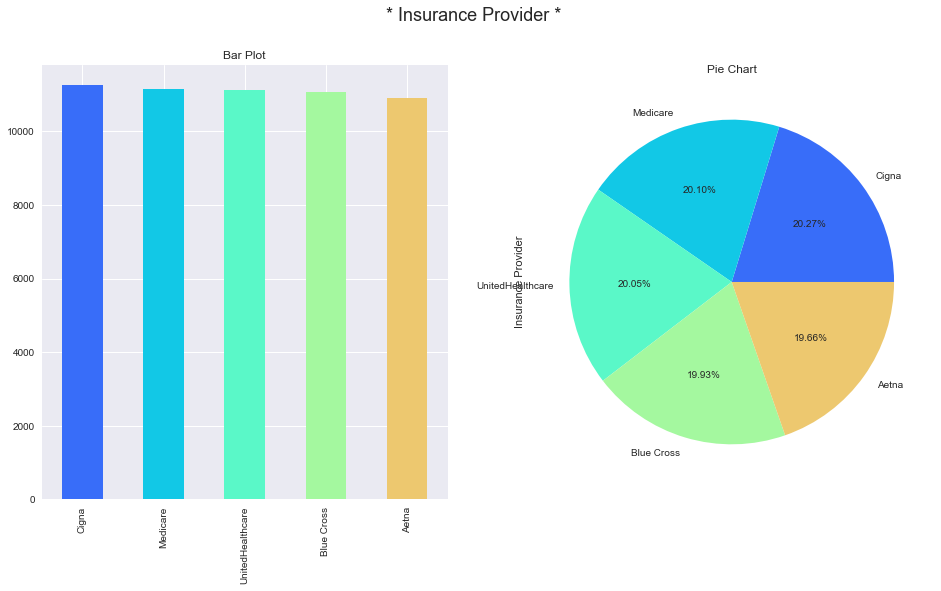

<Figure size 1440x720 with 0 Axes>

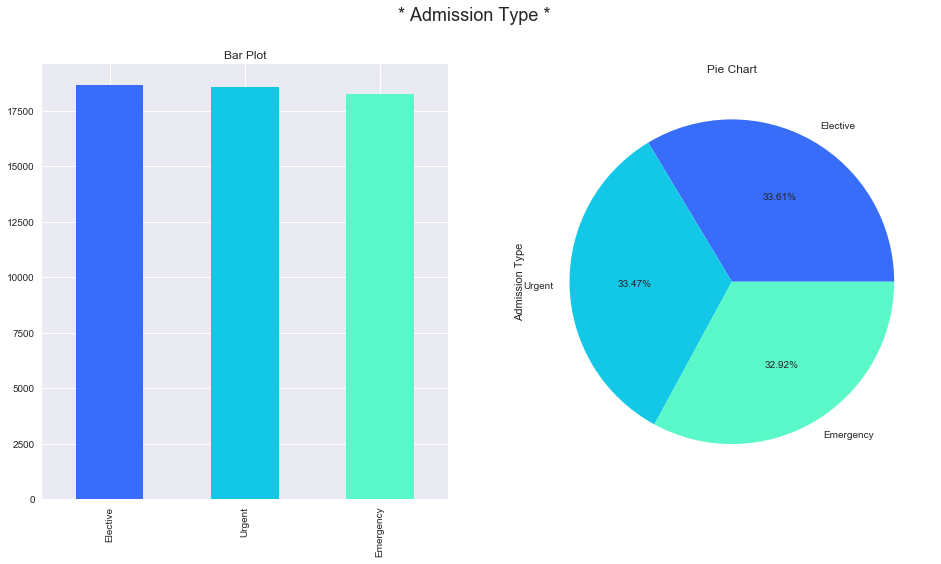

<Figure size 1440x720 with 0 Axes>

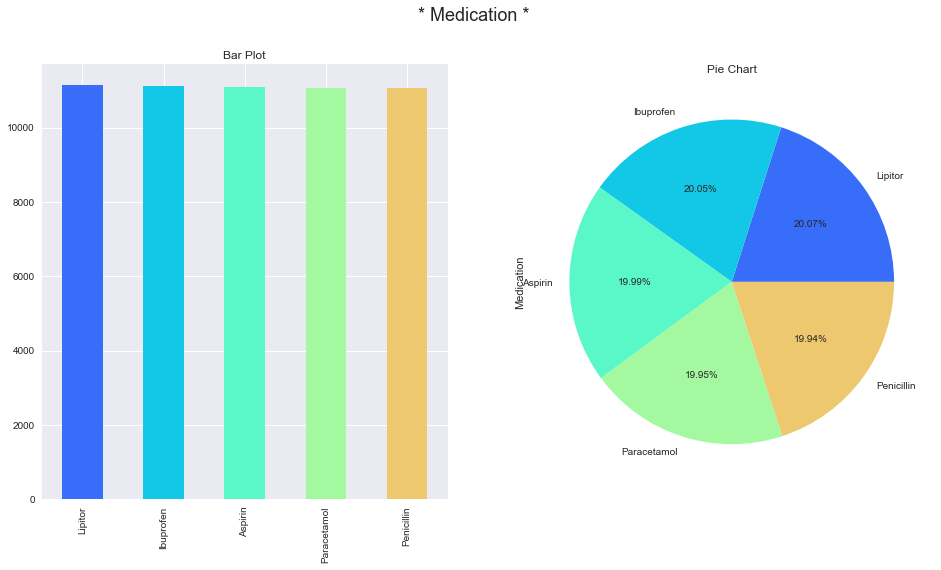

<Figure size 1440x720 with 0 Axes>

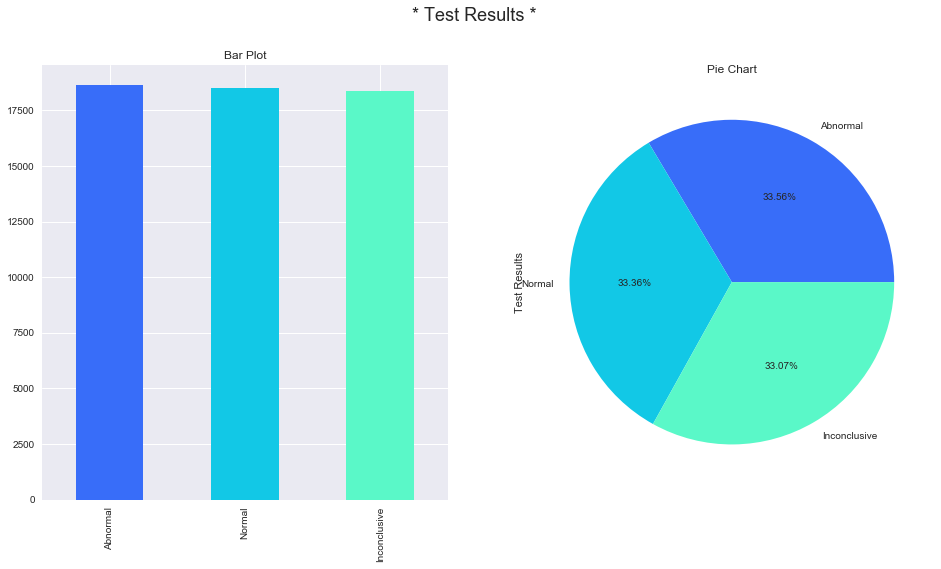

In [267]:
categorical_cols = ['Gender',
 'Blood Type',
 'Medical Condition',
 'Insurance Provider',
 'Admission Type',
 'Medication',
 'Test Results']


for col in categorical_cols:
    plt.figure(figsize=(20,10))
    fig, ax = plt.subplots(1, 2, figsize=(16, 8)) 
    fig.suptitle('* ' + col + ' *', fontsize=18) 
    plt.style.use('seaborn')
    ax[0].set_title('Bar Plot')
    data[col].value_counts().plot(kind='bar', color=sns.color_palette("rainbow"), ax=ax[0])
    ax[1].set_title('Pie Chart')
    data[col].value_counts().plot(kind='pie', autopct="%.2f%%", colors=sns.color_palette("rainbow"),ax=ax[1])
    plt.show()    

In [268]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results,Admit_Duration
0,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,Penicillin,Abnormal,20


### Doing LabelEncoding for target column to change the categorical data into numerical

In [269]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()
data['Medical Condition'] = encoder.fit_transform(data['Medical Condition'])

### Making List of all Categorical columns

In [270]:
cat_col = []
for col in data.columns:
    if data[col].dtype == 'object':
        cat_col.append(col)
print("Categorical Columns:",cat_col)

Categorical Columns: ['Gender', 'Blood Type', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


### Doing Oridinal Encoding of all independent features With respect to dependent features

In [271]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize function for ordinal encoding
def encode_features_target_guided(df,feature,target):
    ordinal_labels=df.groupby([feature])[target].mean().sort_values().index
    encode = {k:i for i,k in enumerate(ordinal_labels,0)}
    df[feature+'_encoded']=df[feature].map(encode)
    # Drop the original feature
    df.drop(columns=[feature], inplace=True)

### Calling ordinal encoder function for each column

In [272]:
for col in cat_col:
    encode_features_target_guided(data,col,'Medical Condition')

### Top five rows of dataset

In [273]:
data.head()

,Age,Medical Condition,Billing Amount,Admit_Duration,Gender_encoded,Blood Type_encoded,Doctor_encoded,Hospital_encoded,Insurance Provider_encoded,Admission Type_encoded,Medication_encoded,Test Results_encoded
0,30,2,18856.281306,2,1,6,20566,12808,3,0,0,2
1,62,5,33643.327287,6,1,7,38659,27497,2,2,4,1
2,76,5,27955.096079,15,0,4,34964,20363,4,2,1,2
3,28,3,37909.782410,30,0,0,25630,21447,2,1,4,0
4,43,2,14238.317814,20,0,5,13176,15094,4,0,2,0


### Droping unwanted features

In [274]:
data = data.drop(columns = ['Hospital_encoded','Insurance Provider_encoded'], axis = 1)

### Making list of all numerical columns

In [275]:
num_col = []
for col in data.columns:
    if data[col].dtype != 'object':
        num_col.append(col)
print(num_col)

['Age', 'Medical Condition', 'Billing Amount', 'Admit_Duration', 'Gender_encoded', 'Blood Type_encoded', 'Doctor_encoded', 'Admission Type_encoded', 'Medication_encoded', 'Test Results_encoded']


### Performing MinMaxScaler on Numerical columns

In [276]:
num_col = ['Age', 'Billing Amount', 'Admit_Duration', 'Gender_encoded', 'Blood Type_encoded', 'Doctor_encoded', 'Admission Type_encoded', 'Medication_encoded', 'Test Results_encoded']

from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

for col in num_col:
    data[[col]] = scale.fit_transform(data[[col]])

### Displaying Preprocessed Data

In [277]:
print("Preprocessed Data:")
data.head()

Preprocessed Data:


,Age,Medical Condition,Billing Amount,Admit_Duration,Gender_encoded,Blood Type_encoded,Doctor_encoded,Admission Type_encoded,Medication_encoded,Test Results_encoded
0,0.223684,2,0.380933,0.034483,1.0,0.857143,0.509817,0.0,0.00,1.0
1,0.644737,5,0.650904,0.172414,1.0,1.000000,0.958329,1.0,1.00,0.5
2,0.828947,5,0.547053,0.482759,0.0,0.571429,0.866733,1.0,0.25,1.0
3,0.197368,3,0.728798,1.000000,0.0,0.000000,0.635350,0.5,1.00,0.0
4,0.394737,2,0.296622,0.655172,0.0,0.714286,0.326624,0.0,0.50,0.0


### Visualize distributions of Age

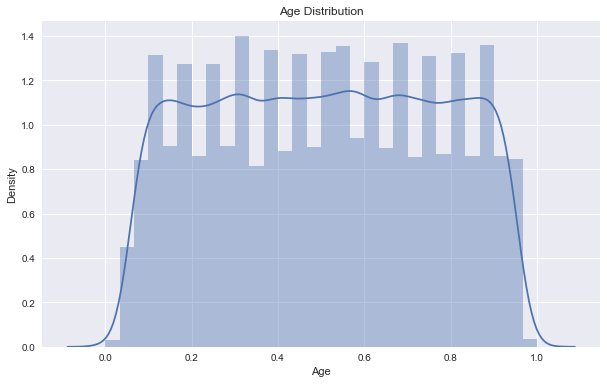

In [278]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

## Model Selection And Training

### Split dataset into train and test

In [279]:
X = data.drop(columns=['Medical Condition'])
y = data['Medical Condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [280]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

#### Model Evaluation for Random Forest

In [281]:
# Predict and evaluate
y_pred = model.predict(X_test)

# Calculate classification metrices
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall  = recall_score(y_test, y_pred,average='weighted')
f1_Score = recall_score(y_test, y_pred,average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1_score: {f1_Score}')

Accuracy: 0.7978378378378378
Precision: 0.8037954668582855
Recall: 0.7978378378378378
F1_score: 0.7978378378378378


### KNN

In [282]:
# Train the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

#### Model Evaluation of KNN

In [283]:
# Predict and evaluate
y_pred = knn.predict(X_test)

# Calculate classification metrices
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall  = recall_score(y_test, y_pred,average='weighted')
f1_Score = recall_score(y_test, y_pred,average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1_score: {f1_Score}')

Accuracy: 0.46378378378378377
Precision: 0.4740048002061049
Recall: 0.46378378378378377
F1_score: 0.46378378378378377


### Decision Tree

In [284]:
# Train the model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Model Evaluation of Decision Tree

In [285]:
# Predict and evaluate
y_pred = dt.predict(X_test)

# Calculate classification metrices
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall  = recall_score(y_test, y_pred,average='weighted')
f1_Score = recall_score(y_test, y_pred,average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1_score: {f1_Score}')

Accuracy: 0.7463963963963964
Precision: 0.7457529374337452
Recall: 0.7463963963963964
F1_score: 0.7463963963963964


### AdaBoostClassifier

In [286]:
# Train the model

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

ada = AdaBoostClassifier()

ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

#### Model Evaluation of AdaBoost

In [287]:
# Predict and evaluate
y_pred = ada.predict(X_test)

# Calculate classification metrices
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall  = recall_score(y_test, y_pred,average='weighted')
f1_Score = recall_score(y_test, y_pred,average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1_score: {f1_Score}')

Accuracy: 0.7793693693693694
Precision: 0.8057775812091758
Recall: 0.7793693693693694
F1_score: 0.7793693693693694


### Gradient Boosting

In [288]:
# train the model
gb = GradientBoostingClassifier()

gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### Model Evaluation of Gradient Boosting

In [289]:
# Predict and evaluate
y_pred = gb.predict(X_test)

# Calculate classification metrices
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall  = recall_score(y_test, y_pred,average='weighted')
f1_Score = recall_score(y_test, y_pred,average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1_score: {f1_Score}')

Accuracy: 0.7836936936936937
Precision: 0.7905512344619818
Recall: 0.7836936936936937
F1_score: 0.7836936936936937


### SVM

In [290]:
# train the model
from sklearn.svm import SVC

sr = SVC()
sr.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Model evaluation of SVM

In [291]:
# Predict and evaluate
y_pred = sr.predict(X_test)

# Calculate classification metrices
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall  = recall_score(y_test, y_pred,average='weighted')
f1_Score = recall_score(y_test, y_pred,average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1_score: {f1_Score}')

Accuracy: 0.7411711711711712
Precision: 0.7465946478291998
Recall: 0.7411711711711712
F1_score: 0.7411711711711712


### Model Optimization

In [292]:
# Hyperparameter tuning
param_grid = {
    'n_estimators': [100,200,250],
    'max_depth' : [10,15,20],
    'min_samples_split' : [2,4,8],
    'min_samples_leaf' : [2,4,6],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_best = best_model.predict(X_test)

# Calculate classification metrices
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best,average='weighted')
recall  = recall_score(y_test, y_pred_best,average='weighted')
f1_Score = recall_score(y_test, y_pred_best,average='weighted')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1_score: {f1_Score}')


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 22.8min finished


Accuracy: 0.7990990990990992
Precision: 0.8168838473346955
Recall: 0.7990990990990992
F1_score: 0.7990990990990992
